/home/ian/PycharmProjects/ece143_direct_marketing/analysis.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_binned['age'] = pd.cut(self.df['age'], self.age_bin_width)


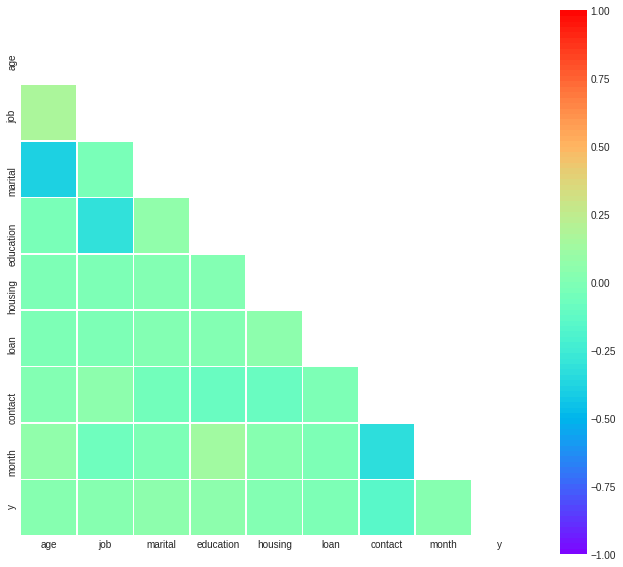

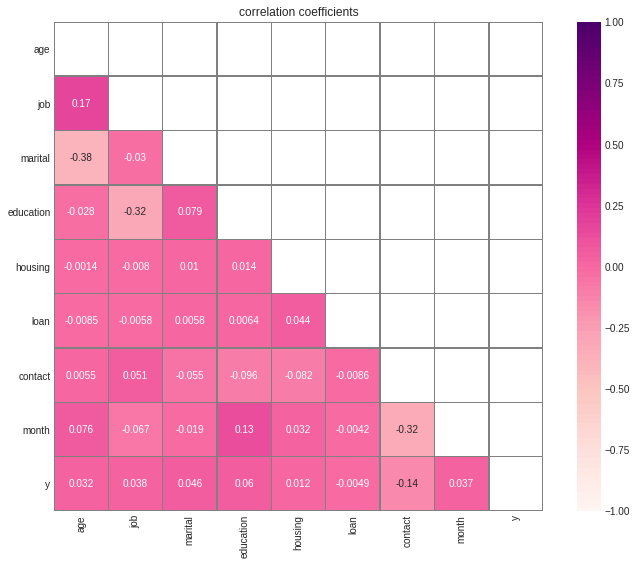

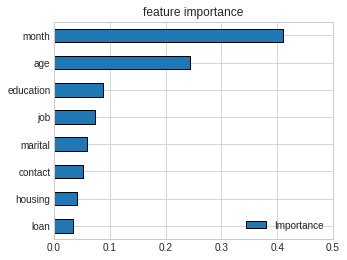

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import config
import analysis
import feature_importance as fi

# Load Data

In [2]:
csv_path = config.bank_additional_path
my_analysis = analysis.Analysis(csv_path)
myList, labels = my_analysis.map_age(csv_path)

# Age Analysis

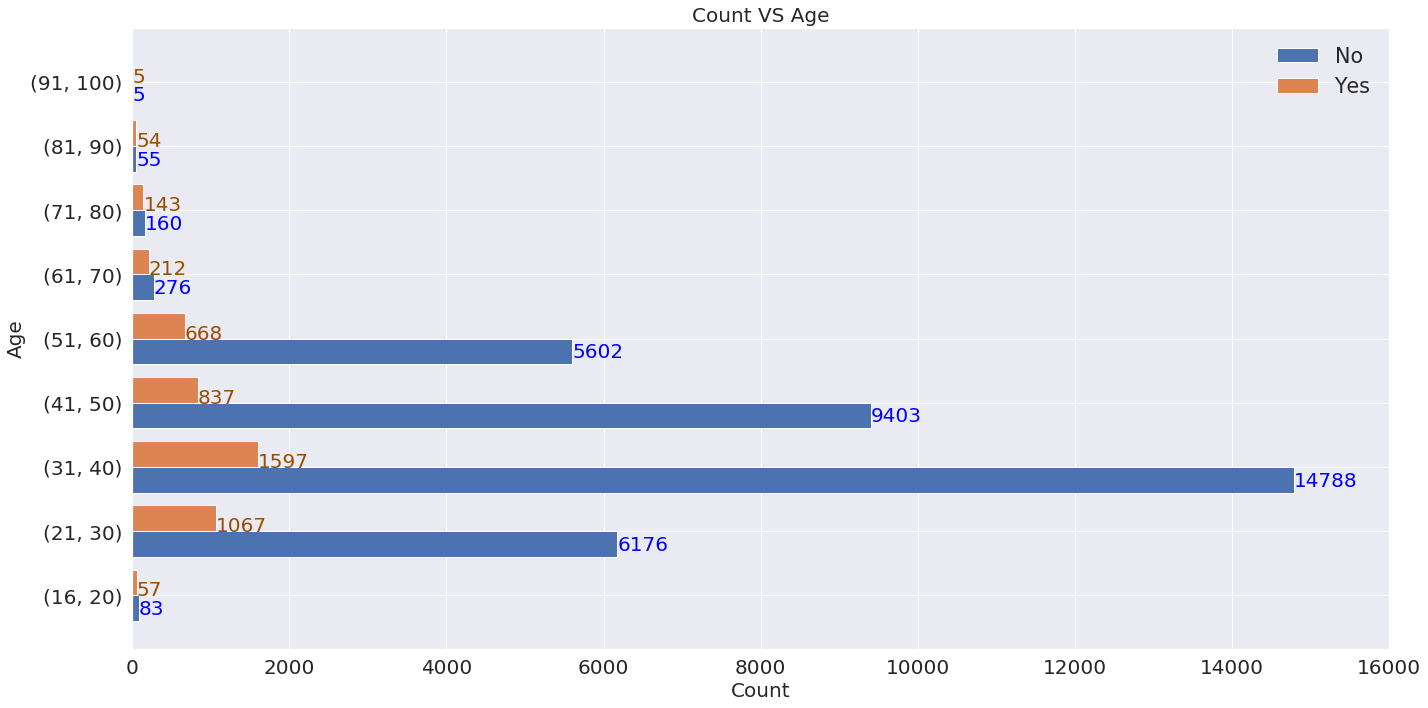

In [3]:
No = [myList[0][0], myList[1][0],myList[2][0], myList[3][0],myList[4][0] ,myList[5][0],myList[6][0], myList[7][0],myList[8][0]]
Yes = [myList[0][1], myList[1][1],myList[2][1], myList[3][1],myList[4][1] ,myList[5][1],myList[6][1], myList[7][1],myList[8][1]]
sns.set(rc={'figure.figsize':(20 ,10)})
x = np.arange(len(labels)) 
width = 0.40  

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2,  No, width, label='No')
rects2 = ax.barh(x + width/2, Yes, width, label='Yes')

ax.set_ylabel('Age', fontsize = 20)
ax.set_xlabel('Count', fontsize = 20)
ax.set_title('Count VS Age', fontsize = 20)

ax.set_xticks(np.arange(0, 17000, step=2000))
plt.tick_params(labelsize=20)
ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize = 20)
ax.legend(fontsize= 'xx-large')

for i, v in enumerate(Yes):
    ax.text(v+0.32,i-0.01, v, color='#994d00', fontsize=20) 
for i, v in enumerate(No):
    ax.text(v+0.17,i-0.3, str(v), color='blue', fontsize=20) 
    
fig.tight_layout()
plt.grid(b=True, which='major', color='#FFFFFF', linestyle='-')
ax.set_facecolor("#EAEAF2")

plt.show()


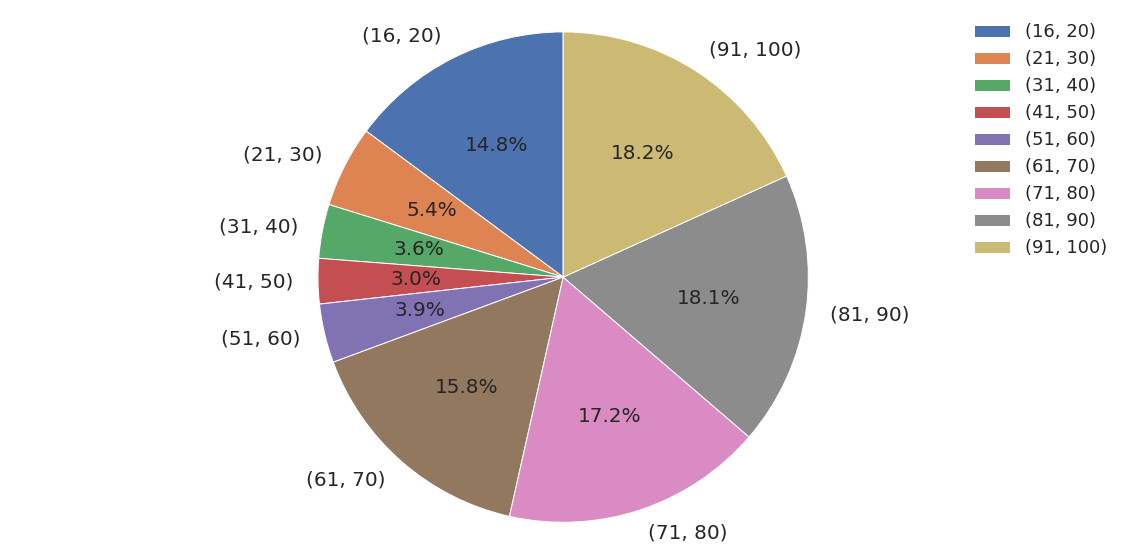

In [4]:
values_prob = my_analysis.get_age_prob_success(myList)
fig1, ax1 = plt.subplots()
ax1.pie(values_prob, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90, textprops={'fontsize': 20})
plt.rcParams['font.size'] = 15.0

ax1.axis('equal')
ax1.legend(fontsize= 'large')

plt.show()

# Marital Status Analysis

In [5]:
marital_analysis = analysis.MaritalAnalysis(csv_path)

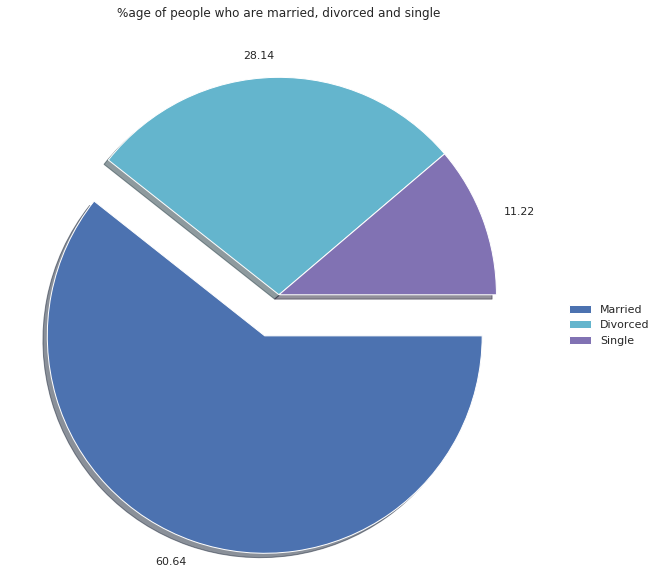

In [6]:
percents = marital_analysis.percentage_of_population('marital')
colors = ['b', 'c', 'm']
labels = ['Married', 'Divorced', 'Single']
explode = (0.2, 0, 0)
plt.pie(percents, colors=colors, labels= percents,explode=explode,counterclock=False, shadow=True)
plt.title('%age of people who are married, divorced and single')
plt.legend(labels,loc='best', bbox_to_anchor=(1.2, 0.5, 0, 0))

[Text(0, 0.5, 'Counts')]

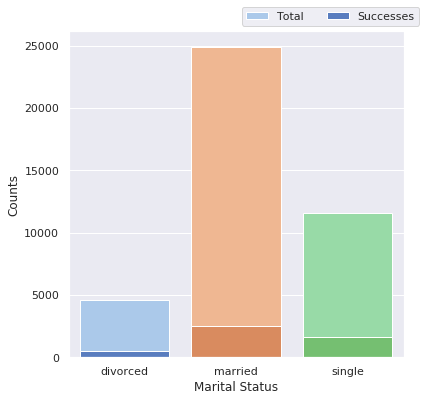

In [7]:
f, ax = plt.subplots(figsize=(6, 6))
marital_status_count = marital_analysis.get_count('marital')
marital_status_success_count = marital_analysis.get_success_count('marital')
sns.barplot(x = marital_status_count['marital'] ,
            y=marital_status_count['y'],
            palette='pastel',
            label="Total")
sns.barplot(x = marital_status_count['marital'],
            y = marital_status_success_count['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, frameon=True, bbox_to_anchor=(0.5, 1, 0, 0))
ax.set(xlabel='Marital Status')
ax.set(ylabel='Counts')

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, 'Marital Status')]

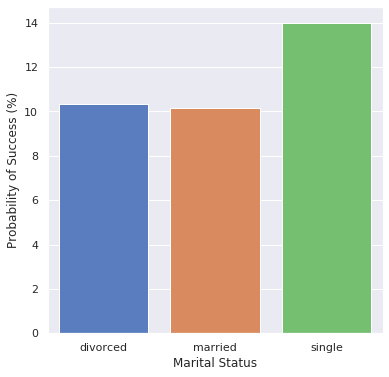

In [8]:
f, ax = plt.subplots(figsize=(6, 6))
marital_status_probab = marital_analysis.get_probabilities('marital')
sns.barplot(x = marital_status_probab['marital'],
            y = marital_status_probab['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)',xlabel='Marital Status')

# Day of the week

In [9]:
plt.style.use([{
    "figure.figsize":(20,20),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn'])

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, '')]

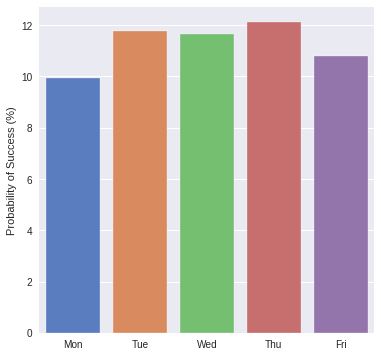

In [10]:
day_of_week_probabilities = my_analysis.get_probabilities('day_of_week')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=analysis.number_to_day_of_week(day_of_week_probabilities['day_of_week']),
            y=day_of_week_probabilities['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)', xlabel=None)


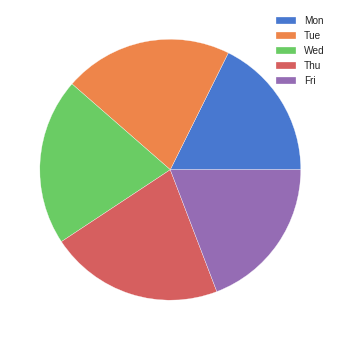

In [11]:
f, ax = plt.subplots(figsize=(6, 6), frameon=False)
day_of_week_relative_probabilities = day_of_week_probabilities
day_of_week_relative_probabilities['y'] = day_of_week_probabilities['y'] / day_of_week_probabilities['y'].sum()
ax.pie(day_of_week_relative_probabilities['y'], colors=sns.color_palette('muted'))
ax.legend(analysis.number_to_day_of_week(day_of_week_probabilities['day_of_week']))

[Text(0.5, 0, 'Counts')]

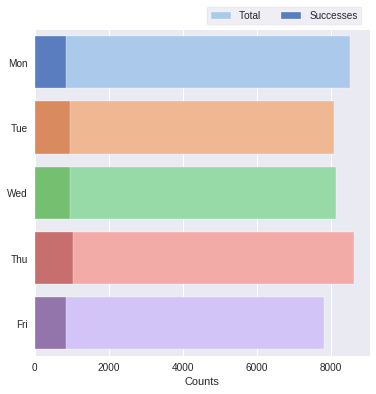

In [12]:
day_of_week_successes = my_analysis.get_success_count('day_of_week')
day_of_week_count = my_analysis.get_count('day_of_week')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(y=analysis.number_to_day_of_week(day_of_week_count['day_of_week']),
            x=day_of_week_count['y'],
            palette='pastel',
            label="Total")
sns.barplot(y=analysis.number_to_day_of_week(day_of_week_successes['day_of_week']),
            x=day_of_week_successes['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, frameon=True, bbox_to_anchor=(0.5,1,0,0))
ax.set(xlabel='Counts')


[Text(0, 0.5, 'Probability (%)'), Text(0.5, 0, 'Counts')]

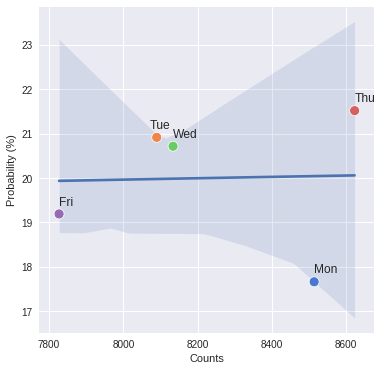

In [13]:
f, ax = plt.subplots(figsize=(6, 6), frameon=False)

day_of_week_pct_probabilities = day_of_week_probabilities['y'] * 100
sns.regplot(x=day_of_week_count['y'], 
            y=day_of_week_pct_probabilities,
            logx=True,
            scatter=False)

sns.scatterplot(x=day_of_week_count['y'], 
                y=day_of_week_pct_probabilities, 
                palette='muted',
                legend=False,
                hue=analysis.number_to_day_of_week(day_of_week_count['day_of_week']),
                s=100)

for day, x, y in zip(analysis.number_to_day_of_week(day_of_week_count['day_of_week']), day_of_week_count['y'], day_of_week_pct_probabilities):
    if day == 'Tue':
        ax.text(x-20, y+0.2, day, fontsize=12)        
    else:
        ax.text(x, y+0.2, day, fontsize=12)
        
ax.set(ylabel='Probability (%)',
       xlabel='Counts')


# Month

[Text(0.5, 0, 'Probability of Success (%)')]

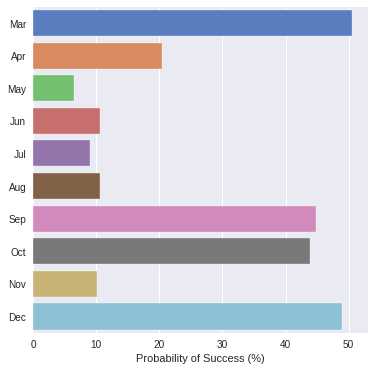

In [14]:
month_probabilities = my_analysis.get_probabilities('month')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(y=analysis.number_to_month(month_probabilities['month']),
            x=month_probabilities['y'] * 100,
            palette='muted')
ax.set(xlabel='Probability of Success (%)',)



/home/ian/miniconda3/envs/ece143_direct_marketing/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


[Text(0.5, 0, 'Counts')]

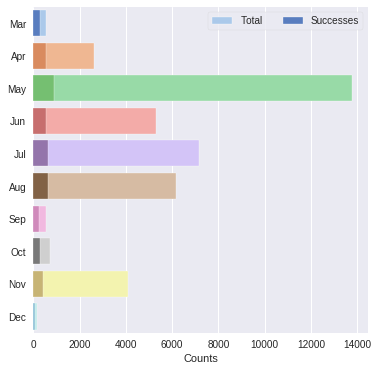

In [15]:
month_successes = my_analysis.get_success_count('month')
month_count = my_analysis.get_count('month')

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(y=analysis.number_to_month(month_count['month']),
            x=month_count['y'],
            palette='pastel',
            label="Total")
sns.barplot(y=analysis.number_to_month(month_successes['month']),
            x=month_successes['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, loc="top right", frameon=True)
ax.set(xlabel='Counts')

[Text(0, 0.5, 'Probability (%)'), (0, 15000), Text(0.5, 0, 'Count')]

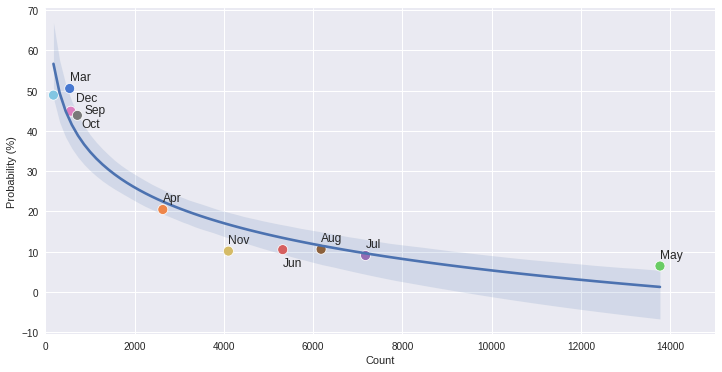

In [16]:
month_pct_probabilities = month_probabilities['y'] * 100

f, ax = plt.subplots(figsize=(12, 6), frameon=False)
sns.regplot(x=month_count['y'], 
            y=month_pct_probabilities,
            logx=True,
            scatter=False)
            
sns.scatterplot(x=month_count['y'], 
                y=month_pct_probabilities, 
                palette='muted',
                hue=analysis.number_to_month(month_count['month']),
                legend=False,
                s=100)

for month, x, y in zip(analysis.number_to_month(month_count['month']), month_count['y'], month_pct_probabilities):
    if month == 'Oct':
        ax.text(x+100, y-3, month, fontsize=12)
    elif month == 'Sep':
        ax.text(x+300, y-0.5, month, fontsize=12)
    elif month == 'Dec':
        ax.text(x+500, y-1.5, month, fontsize=12)
    elif month == 'Jun':
        ax.text(x, y-4, month, fontsize=12)
    else:
        ax.text(x, y+2, month, fontsize=12)

ax.set(ylabel='Probability (%)',
       xlabel='Count',
       xlim=[0, 15000])


In [17]:
month_filter = month_count['y'] > 1000

[Text(0, 0.5, 'Probability of Success (%)'), Text(0.5, 0, '')]

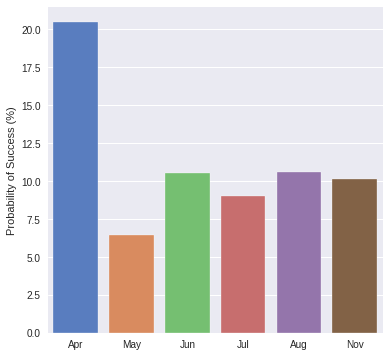

In [18]:
month_probabilities_filtered = month_probabilities[month_filter]

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=analysis.number_to_month(month_probabilities_filtered['month']),
            y=month_probabilities_filtered['y'] * 100,
            palette='muted')
ax.set(ylabel='Probability of Success (%)',
       xlabel=None)

/home/ian/miniconda3/envs/ece143_direct_marketing/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


[Text(0, 0.5, 'Counts')]

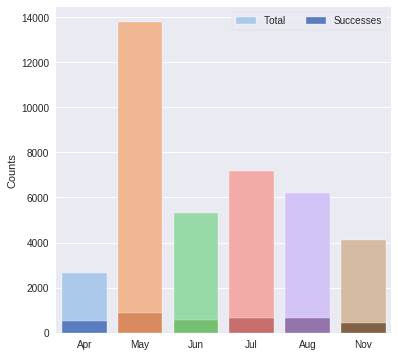

In [19]:
month_successes_filtered = month_successes[month_filter]
month_count_filtered = month_count[month_filter]

f, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.barplot(x=analysis.number_to_month(month_count_filtered['month']),
            y=month_count_filtered['y'],
            palette='pastel',
            label="Total")
sns.barplot(x=analysis.number_to_month(month_successes_filtered['month']),
            y=month_successes_filtered['y'],
            palette='muted',
            label="Successes")
ax.legend(ncol=2, loc="top right", frameon=True)
ax.set(ylabel='Counts')

# Feature Importance

In [20]:
feature_analysis = analysis.FeatureAnalysis(config.bank_additional_path)

/home/ian/PycharmProjects/ece143_direct_marketing/analysis.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_binned['age'] = pd.cut(self.df['age'], self.age_bin_width)


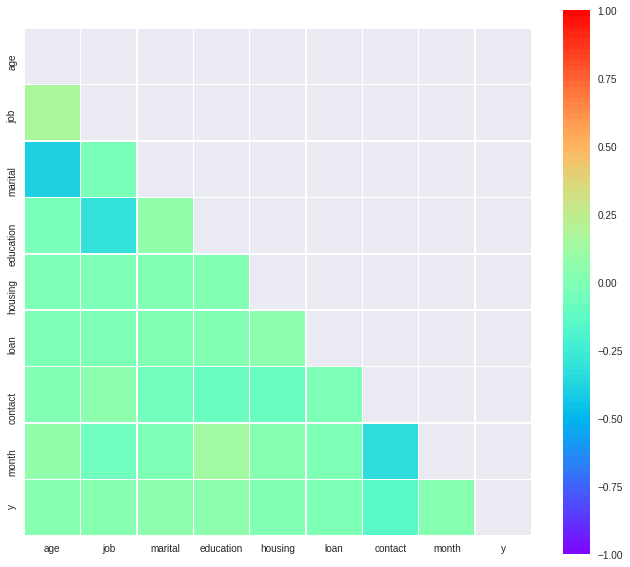

In [21]:
fig = plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)

mask = np.zeros_like(feature_analysis.df_encoded.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(feature_analysis.df_encoded.corr(),
            vmin=-1, vmax=1,
            square=True,
            cmap=sns.color_palette("rainbow", 100),
            mask=mask,
            linewidths=.5)

Text(0.5, 1, 'correlation coefficients')

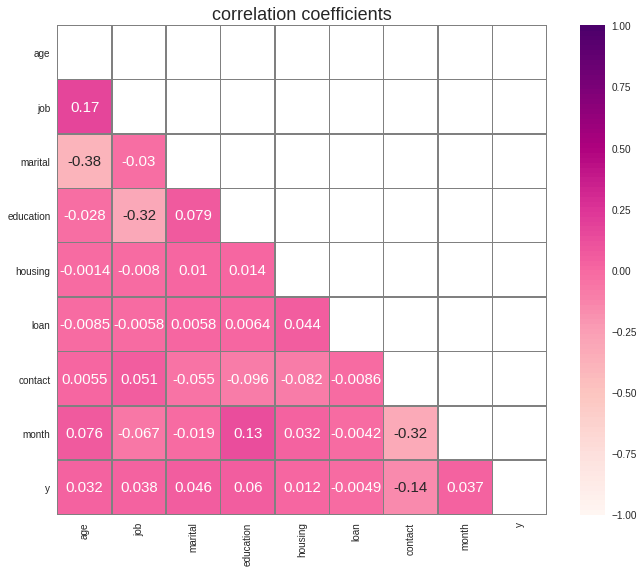

In [22]:
correlation_matrix = feature_analysis.df_encoded.corr()
f, ax = plt.subplots(figsize=(12, 9))
ax.set_xticklabels(correlation_matrix, rotation='horizontal')
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1.0, 1.0, 1.0))

sns.heatmap(correlation_matrix,
            vmin=-1, vmax=1,
            square=True,
            annot=True,
            cmap=sns.color_palette("RdPu", 100),
            mask=mask,
            linewidths=.5,
            linecolor='grey')
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=90)
plt.title('correlation coefficients', fontsize='large')

(0, 0.5)

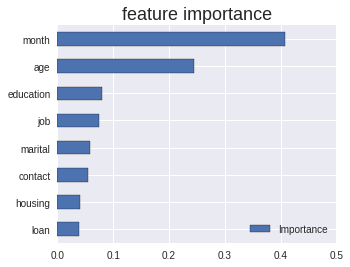

In [23]:
importance = feature_analysis.get_feature_importance()
importance.plot(kind='barh', figsize=(5, len(importance) / 2), edgecolor='black');
plt.title('feature importance', fontsize='large')
plt.xlim((0, 0.5))